In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                              roc_curve, roc_auc_score, precision_recall_curve,
                              average_precision_score, ConfusionMatrixDisplay)

sns.set_theme(style="whitegrid", palette="Set2", font_scale=1.1)

# Загрузка Pima Indians Diabetes
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

print(f"Датасет: {df.shape[0]} строк × {df.shape[1]} столбцов")
print(f"Целевая переменная: Outcome (0 = нет диабета, 1 = диабет)")

Датасет: 768 строк × 9 столбцов
Целевая переменная: Outcome (0 = нет диабета, 1 = диабет)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Баланс классов:
0    500
1    268
Name: Outcome, dtype: int64

Процент больных диабетом: 34.9%


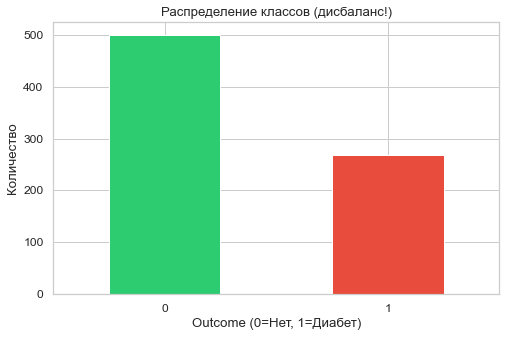

In [2]:
df.head()
df.info()
df.describe()

# Баланс классов — КРИТИЧНО!
class_counts = df['Outcome'].value_counts()
print("\nБаланс классов:")
print(class_counts)
print(f"\nПроцент больных диабетом: {class_counts[1] / len(df) * 100:.1f}%")

# Визуализация дисбаланса
plt.figure(figsize=(8, 5))
df['Outcome'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.xlabel('Outcome (0=Нет, 1=Диабет)')
plt.ylabel('Количество')
plt.title('Распределение классов (дисбаланс!)')
plt.xticks(rotation=0)
plt.show()

Коэффициент корреляции Пирсона - это статистическая мера, определяющая силу и направление линейной связи между двумя количественными переменными. Он изменяется от -1 до +1, где 1 означает идеальную прямую зависимость, -1 — идеальную обратную, а 0 — отсутствие линейной связи. Применяется для непрерывных величин с нормальным распределением. 
Чем ближе модуль к 1, тем теснее связь.
Условия применения:
-        Данные измерены в метрических шкалах (интервальной или отношений).
-        Распределение обеих величин близко к нормальному.
-        Связь между переменными должна быть линейной (при криволинейной связи коэффициент не работает).

Ограничения: Коэффициент чувствителен к выбросам (аномальным значениям) и показывает только линейную, а не монотонную связь. 

Корреляция с диабетом:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


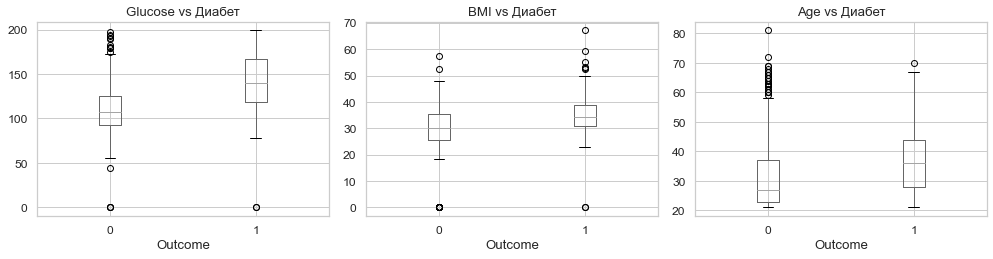

In [4]:
# Корреляция признаков с Outcome- функция вычисляет коэффициент корреляции Пирсона  
# Результат Series (список), где показано, как каждый признак (возраст, вес, давление и т.д.) коррелирует  с Outcome

target_corr = df.corr()['Outcome'].sort_values(ascending=False) 
print("Корреляция с диабетом:")
print(target_corr)

# Топ-3 признака
plt.figure(figsize=(14, 4))
top_features = ['Glucose', 'BMI', 'Age']  # Самые коррелирующие

for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    df.boxplot(column=feature, by='Outcome', ax=plt.gca())
    plt.suptitle('')
    plt.title(f'{feature} vs Диабет')
    plt.xlabel('Outcome')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop('Outcome', axis=1).values # X присваиваем df, в котором удаляем столбец с названием 'Outcome' (axis=1 указывает, что "удаляемый" - столбец)
y = df['Outcome'].values

# TODO: разделите на train/test (70/30, stratify, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= , stratify= , random_state=
)

print(f"Train: {X_train.shape[0]} samples")
print(f"Test:  {X_test.shape[0]} samples")
print(f"Баланс в test: {np.bincount(y_test)}")

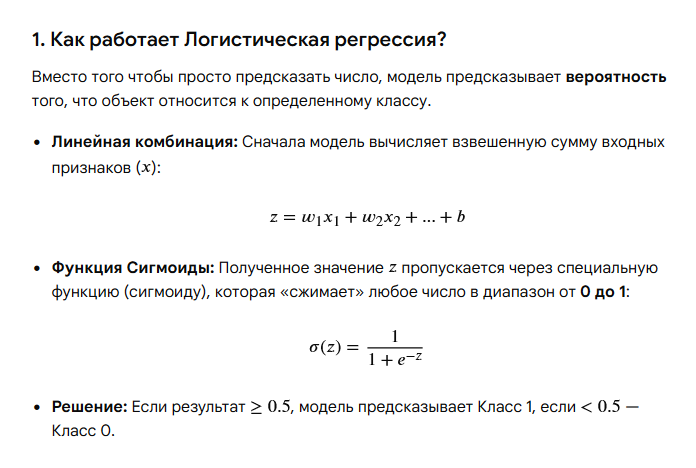

In [7]:
# Обучение модели
model = LogisticRegression(max_iter=1000, random_state=42) #создаем «пустую» модель, итериций по умаолчанию 100
model.fit(X_train, y_train) # Обучение:  Модель берет данные и начинает подбирать коэффициенты (w), используя метод 
# градиентного спуска: делает предсказание, смотрит на ошибку и немного меняет веса, чтобы в следующий раз ошибка была меньше.
# Процесс повторяется, пока ошибка не станет минимальной или не закончатся max_iter шагов.
#Логистическая регрессия очень чувствительна к масштабу данных. 
#Если один признак измеряется в миллионах, а другой в единицах, модель будет работать плохо.

# Предсказание ВЕРОЯТНОСТЕЙ!
y_prob = model.predict_proba(X_test)[:, 1]  # Вероятность класса 1 (диабет)
y_pred = (y_prob >= 0.5).astype(int)        # Порог 0.5 → классы

print("Первые 10 предсказаний:")
print("Реальный класс | Вероятность | Предсказанный класс (порог 0.5)")
for i in range(10):
    print(f"      {y_test[i]}        |    {y_prob[i]:.3f}      |           {y_pred[i]}")

Первые 10 предсказаний:
Реальный класс | Вероятность | Предсказанный класс (порог 0.5)
      1        |    0.228      |           0
      1        |    0.298      |           0
      1        |    0.726      |           1
      1        |    0.632      |           1
      1        |    0.443      |           0
      0        |    0.079      |           0
      0        |    0.726      |           1
      0        |    0.125      |           0
      0        |    0.043      |           0
      0        |    0.352      |           0


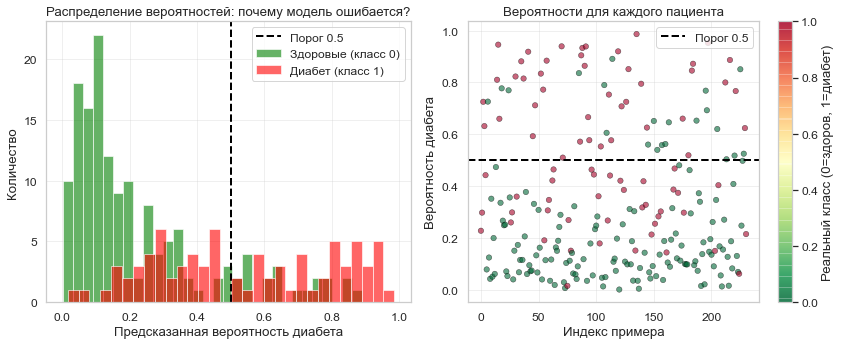

In [8]:
plt.figure(figsize=(12, 5))

# График 1: Гистограмма вероятностей по классам
plt.subplot(1, 2, 1)
plt.hist(y_prob[y_test == 0], bins=30, alpha=0.6, label='Здоровые (класс 0)', color='green')
plt.hist(y_prob[y_test == 1], bins=30, alpha=0.6, label='Диабет (класс 1)', color='red')
plt.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Порог 0.5')
plt.xlabel('Предсказанная вероятность диабета')
plt.ylabel('Количество')
plt.title('Распределение вероятностей: почему модель ошибается?')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Scatter вероятностей
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_prob)), y_prob, c=y_test, cmap='RdYlGn_r', 
            alpha=0.6, s=30, edgecolors='black', linewidth=0.5)
plt.axhline(0.5, color='black', linestyle='--', linewidth=2, label='Порог 0.5')
plt.xlabel('Индекс примера')
plt.ylabel('Вероятность диабета')
plt.title('Вероятности для каждого пациента')
plt.colorbar(label='Реальный класс (0=здоров, 1=диабет)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

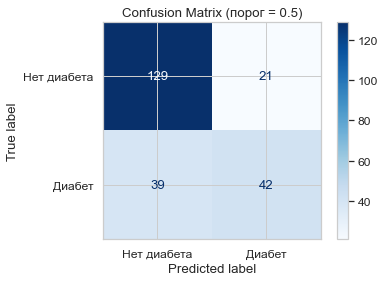


Classification Report (порог 0.5):
              precision    recall  f1-score   support

 Нет диабета       0.77      0.86      0.81       150
      Диабет       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Нет диабета', 'Диабет'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (порог = 0.5)')
plt.show()

print("\nClassification Report (порог 0.5):")
print(classification_report(y_test, y_pred, target_names=['Нет диабета', 'Диабет']))

In [10]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    results.append({
        'Порог': thresh,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'FP': fp,
        'FN': fn
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

 Порог  Precision    Recall  F1-score  FP  FN
   0.3   0.613861  0.765432  0.681319  39  19
   0.4   0.666667  0.641975  0.654088  26  29
   0.5   0.666667  0.518519  0.583333  21  39
   0.6   0.714286  0.432099  0.538462  14  46
   0.7   0.783784  0.358025  0.491525   8  52


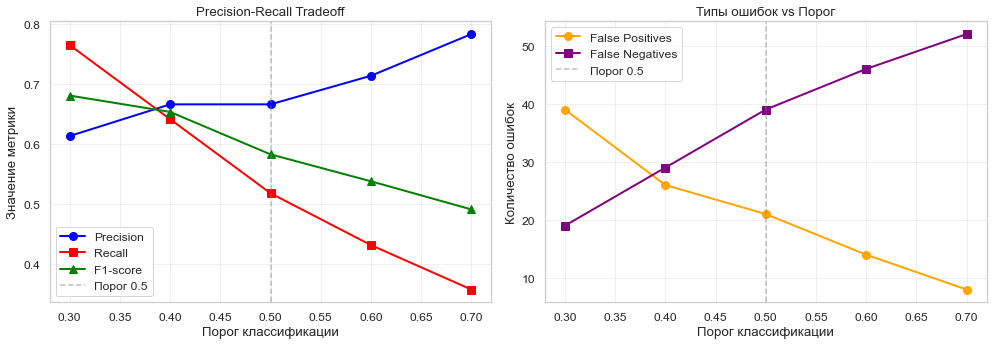

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График 1: Precision vs Recall vs Threshold
axes[0].plot(results_df['Порог'], results_df['Precision'], 'o-', 
             linewidth=2, markersize=8, label='Precision', color='blue')
axes[0].plot(results_df['Порог'], results_df['Recall'], 's-', 
             linewidth=2, markersize=8, label='Recall', color='red')
axes[0].plot(results_df['Порог'], results_df['F1-score'], '^-', 
             linewidth=2, markersize=8, label='F1-score', color='green')
axes[0].axvline(0.5, color='gray', linestyle='--', alpha=0.5, label='Порог 0.5')
axes[0].set_xlabel('Порог классификации')
axes[0].set_ylabel('Значение метрики')
axes[0].set_title('Precision-Recall Tradeoff')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: FP vs FN vs Threshold
axes[1].plot(results_df['Порог'], results_df['FP'], 'o-', 
             linewidth=2, markersize=8, label='False Positives', color='orange')
axes[1].plot(results_df['Порог'], results_df['FN'], 's-', 
             linewidth=2, markersize=8, label='False Negatives', color='purple')
axes[1].axvline(0.5, color='gray', linestyle='--', alpha=0.5, label='Порог 0.5')
axes[1].set_xlabel('Порог классификации')
axes[1].set_ylabel('Количество ошибок')
axes[1].set_title('Типы ошибок vs Порог')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

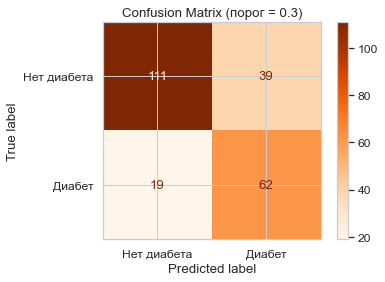


Classification Report (порог 0.3):
              precision    recall  f1-score   support

 Нет диабета       0.85      0.74      0.79       150
      Диабет       0.61      0.77      0.68        81

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.75       231



In [12]:
# Выбираем порог 0.3 — много recalls, мало precision
thresh_custom = 0.3
y_pred_custom = (y_prob >= thresh_custom).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
disp_custom = ConfusionMatrixDisplay(cm_custom, display_labels=['Нет диабета', 'Диабет'])
disp_custom.plot(cmap='Oranges', values_format='d')
plt.title(f'Confusion Matrix (порог = {thresh_custom})')
plt.show()

print(f"\nClassification Report (порог {thresh_custom}):")
print(classification_report(y_test, y_pred_custom, target_names=['Нет диабета', 'Диабет']))

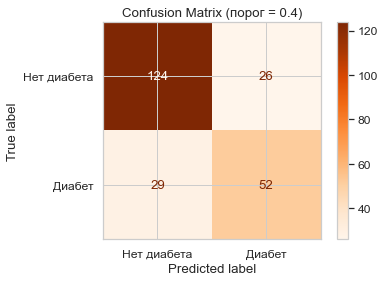


Classification Report (порог 0.4):
              precision    recall  f1-score   support

 Нет диабета       0.81      0.83      0.82       150
      Диабет       0.67      0.64      0.65        81

    accuracy                           0.76       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.76      0.76       231



In [13]:
# Выбираем порог 0.4 — баланс
thresh_custom = 0.4
y_pred_custom = (y_prob >= thresh_custom).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
disp_custom = ConfusionMatrixDisplay(cm_custom, display_labels=['Нет диабета', 'Диабет'])
disp_custom.plot(cmap='Oranges', values_format='d')
plt.title(f'Confusion Matrix (порог = {thresh_custom})')
plt.show()

print(f"\nClassification Report (порог {thresh_custom}):")
print(classification_report(y_test, y_pred_custom, target_names=['Нет диабета', 'Диабет']))

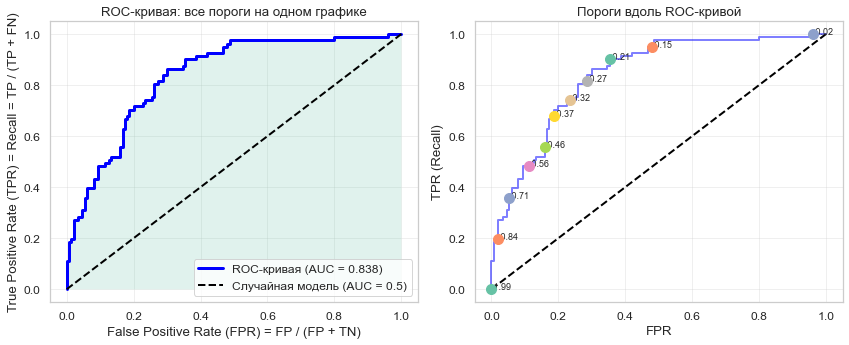

ROC-AUC = 0.8376
Интерпретация: вероятность того, что модель даст случайному больному
более высокую вероятность, чем случайному здоровому = 83.8%


In [14]:
# Вычисляем ROC-кривую
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob) # функция roc_curve берет (y_test) и предсказанные моделью вероятности (y_prob) 
#Затем она начинает перебирать пороги (thresholds) от 1.0 до 0.0.
#Для каждого порога расчитывает матрицу ошибок для разных порогов: 
#«А что, если мы будем считать "единицей" только тех, у кого вероятность > 0.9? 
#А если > 0.8?». Для каждого такого варианта она считает:
#TPR (True Positive Rate) — сколько больных мы нашли.
#FPR (False Positive Rate) — сколько здоровых мы ошибочно назвали больными.
#Функция возвращает три массива данных. Обычно её вызывают так:
#fpr: Массив значений по оси X (от 0 до 1).
#tpr: Массив значений по оси Y (от 0 до 1).
#thresholds: Те самые пороги, которые она проверяла. Их обычно столько же, сколько уникальных значений в y_prob.

plt.figure(figsize=(12, 5))

# График 1: ROC-кривая
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, linewidth=3, label=f'ROC-кривая (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Случайная модель (AUC = 0.5)')
plt.fill_between(fpr, tpr, alpha=0.2)
plt.xlabel('False Positive Rate (FPR) = FP / (FP + TN)')
plt.ylabel('True Positive Rate (TPR) = Recall = TP / (TP + FN)')
plt.title('ROC-кривая: все пороги на одном графике')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

# График 2: Порог вдоль ROC-кривой
plt.subplot(1, 2, 2)
# Отображаем каждые N-ю точку для читаемости
step = len(thresholds_roc) // 10
for i in range(0, len(thresholds_roc), step):
    plt.scatter(fpr[i], tpr[i], s=100, zorder=5)
    plt.text(fpr[i], tpr[i], f' {thresholds_roc[i]:.2f}', fontsize=9)
plt.plot(fpr, tpr, linewidth=2, color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
plt.title('Пороги вдоль ROC-кривой')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"ROC-AUC = {roc_auc:.4f}")
print(f"Интерпретация: вероятность того, что модель даст случайному больному")
print(f"более высокую вероятность, чем случайному здоровому = {roc_auc:.1%}")

## Функция precision_recall_curve(y_test, y_prob) 
используется для оценки качества бинарной классификации, особенно когда классы несбалансированы (например, больных 1%, а здоровых 99%). 
Что делает эта функция?
Она вычисляет значения точности (precision) и полноты (recall) для множества различных порогов вероятности. 

    y_test: Истинные метки классов (0 или 1).
    y_prob: Вероятности положительного класса (обычно это model.predict_proba(X_test)[:, 1]). 

Что она возвращает?
Функция возвращает три массива: 

    precision: Значения точности для каждого порога.
    recall: Значения полноты для каждого порога.
    thresholds: Сами пороговые значения (от 0 до 1). 

Как это работает «на пальцах»?
Модель выдает вероятность (например, 0.6). Чтобы решить, «1» это или «0», нужен порог:

    Если поставить порог 0.1, модель будет называть «единицей» почти всё подряд. Полнота будет высокой (найдем всех больных), но точность низкой (будет много ложных тревог).
    Если поставить порог 0.9, модель станет «осторожной». Точность вырастет (ошибок мало), но полнота упадет (пропустим многих реальных больных). 

precision_recall_curve автоматически перебирает все возможные пороги и показывает этот компромисс. 
Как интерпретировать результат?
Обычно результат визуализируют в виде графика (PR-кривой): 

    Идеальная модель: Кривая стремится в правый верхний угол (где и точность, и полнота равны 1.0).
    Случайная модель: Кривая будет выглядеть как горизонтальная линия на уровне доли положительного класса в данных. 

Зачем это нужно вам?
Чтобы выбрать оптимальный порог под вашу задачу. Например, если вам критично не пропустить ни одного мошенника (нужна высокая полнота), вы по графику найдете порог, при котором полнота высокая, а точность еще остается приемлемой

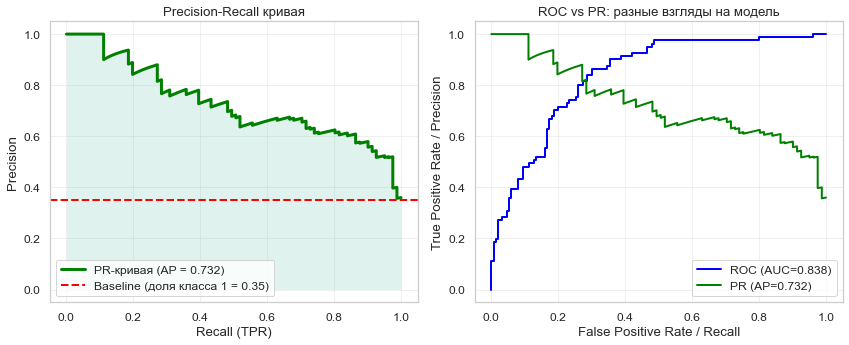


ROC-AUC = 0.838  ← Хорошо при сбалансированных классах
PR-AUC  = 0.732  ← Важнее при дисбалансе (фокус на редком классе)


In [15]:
# Вычисляем PR-кривую
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Baseline для PR-кривой = доля положительного класса
baseline_pr = y_test.sum() / len(y_test)

plt.figure(figsize=(12, 5))

# График 1: PR-кривая
plt.subplot(1, 2, 1)
plt.plot(recall_curve, precision_curve, linewidth=3, 
         label=f'PR-кривая (AP = {pr_auc:.3f})', color='green')
plt.axhline(baseline_pr, color='red', linestyle='--', linewidth=2, 
            label=f'Baseline (доля класса 1 = {baseline_pr:.2f})')
plt.fill_between(recall_curve, precision_curve, alpha=0.2)
plt.xlabel('Recall (TPR)')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

# График 2: Сравнение ROC vs PR
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC (AUC={roc_auc:.3f})', color='blue')
plt.plot(recall_curve, precision_curve, linewidth=2, 
         label=f'PR (AP={pr_auc:.3f})', color='green')
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.title('ROC vs PR: разные взгляды на модель')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nROC-AUC = {roc_auc:.3f}  ← Хорошо при сбалансированных классах")
print(f"PR-AUC  = {pr_auc:.3f}  ← Важнее при дисбалансе (фокус на редком классе)")

## Регуляризация 
Это «штрафы», которые накладываются на модель, чтобы она не становилась слишком сложной и не начала переобучаться (зазубривать тренировочные данные).
Когда мы обучаем модель, она пытается сделать веса (w) такими, чтобы минимизировать ошибку. Регуляризация добавляет к ошибке «цену» за размер этих самых весов.
1. penalty='l2' (Ridge или Ридж-регрессия)
Это стандарт по умолчанию в большинстве моделей (например, в LogisticRegression).
Как работает: Штрафует за квадрат значения весов.
Эффект: Она заставляет веса быть очень маленькими, стремящимися к нулю, но никогда не делает их ровно нулями.
Зачем это нужно: Чтобы ни один признак не имел слишком огромного влияния на результат. Это делает модель более устойчивой к шумам.
Аналогия: Представьте, что вы просите повара использовать как можно меньше специй, но не запрещаете ни одну из них полностью. Блюдо станет сбалансированным.
2. penalty='l1' (Lasso или Лассо-регрессия)
Как работает: Штрафует за абсолютное значение (модуль) весов.
Эффект: Она буквально обнуляет веса самых слабых признаков.
Зачем это нужно: Это автоматический отбор признаков. Если у вас 100 признаков, а реально важны только 5, L1-регуляризация занулит остальные 95.
Аналогия: Вы говорите повару: «Используй минимум ингредиентов». В итоге он выкинет петрушку и лавровый лист, оставив только соль и мясо.

L1 Повышает точность и стабильность	L2 Помогает отобрать важные признаки

In [18]:
# Обучаем 3 модели
models = {
    'Без регуляризации': LogisticRegression(penalty='none', max_iter=1000, random_state=42),
    'L2 (Ridge)': LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42),
    'L1 (Lasso)': LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000, random_state=42),
}

results_reg = []
feature_names = df.drop('Outcome', axis=1).columns

for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob_temp = model.predict_proba(X_test)[:, 1]
    auc_temp = roc_auc_score(y_test, y_prob_temp)
    
    results_reg.append({
        'Модель': name,
        'ROC-AUC': auc_temp,
        'Коэффициенты': model.coef_[0]
    })

print("Сравнение регуляризации:")
for res in results_reg:
    print(f"\n{res['Модель']}:")
    print(f"  ROC-AUC: {res['ROC-AUC']:.4f}")
    print("  Топ-3 признака по abs(коэф):")
    coefs = res['Коэффициенты']
    top_idx = np.argsort(np.abs(coefs))[-3:][::-1]
    for idx in top_idx:
        print(f"    {feature_names[idx]:25s}: {coefs[idx]:+7.3f}")

Сравнение регуляризации:

Без регуляризации:
  ROC-AUC: 0.8382
  Топ-3 признака по abs(коэф):
    DiabetesPedigreeFunction :  +0.712
    Pregnancies              :  +0.140
    BMI                      :  +0.093

L2 (Ridge):
  ROC-AUC: 0.8376
  Топ-3 признака по abs(коэф):
    DiabetesPedigreeFunction :  +0.633
    Pregnancies              :  +0.139
    BMI                      :  +0.093

L1 (Lasso):
  ROC-AUC: 0.8369
  Топ-3 признака по abs(коэф):
    DiabetesPedigreeFunction :  +0.544
    Pregnancies              :  +0.134
    BMI                      :  +0.084


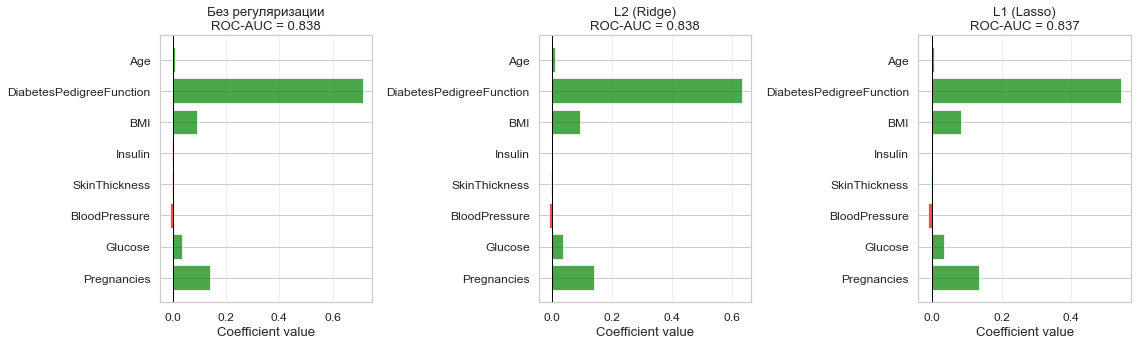


Что мы видим:
• L1 (Lasso) обнуляет некоторые коэффициенты → feature selection
• L2 (Ridge) уменьшает все коэффициенты → меньше переобучение
• Без регуляризации — максимальные коэффициенты, риск переобучения


In [19]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, res in enumerate(results_reg):
    ax = axes[i]
    coefs = res['Коэффициенты']
    colors = ['green' if c > 0 else 'red' for c in coefs]
    ax.barh(feature_names, coefs, color=colors, alpha=0.7)
    ax.set_xlabel('Coefficient value')
    ax.set_title(f"{res['Модель']}\nROC-AUC = {res['ROC-AUC']:.3f}")
    ax.axvline(0, color='black', linewidth=1)
    ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\nЧто мы видим:")
print("• L1 (Lasso) обнуляет некоторые коэффициенты → feature selection")
print("• L2 (Ridge) уменьшает все коэффициенты → меньше переобучение")
print("• Без регуляризации — максимальные коэффициенты, риск переобучения")